# **Territory Performance Analysis Using Logistic Regression**

*This study aims to categorize sales territories into high and low performance based on Year-To-Date sales (SalesYTD), last year's sales (SalesLastYear), and the difference between them (SalesDifference). A logistic regression model was utilized to classify the sales territories, providing insights that could inform resource allocation strategies. The purpose of this study is to apply a logistic regression model to predict territory performance. By classifying territories into high or low performance, the model aims to support strategic decisions in resource allocation.*



# **Step 1: Set up the Environment**

In [ ]:
# Install necessary libraries
!pip install google-cloud-bigquery pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Import libraries
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Authenticate to BigQuery
auth.authenticate_user()

# **Step 2: Connect to BigQuery and Load Data**

In [ ]:
# Initialize a BigQuery client
project_id = 'datawarehouse-subject'
client = bigquery.Client(project=project_id)

In [ ]:
# SQL query to retrieve data from BigQuery
query = """
SELECT * FROM OLAP.DimTerritory;
"""

# Load the data into a pandas DataFrame
df = client.query(query).to_dataframe()

# **Step 3: Data Preprocessing**

In [ ]:
df.head()

,TerritoryID,Name,CountryRegionCode,TerritoryGroup,SalesYTD,SalesLastYear,CostYTD,CostLastYear
0,8,Germany,DE,Europe,3.805202e+06,1.307950e+06,0.0,0.0
1,7,France,FR,Europe,4.772398e+06,2.396540e+06,0.0,0.0
2,10,United Kingdom,GB,Europe,5.012905e+06,1.635823e+06,0.0,0.0
3,9,Australia,AU,Pacific,5.977815e+06,2.278549e+06,0.0,0.0
4,6,Canada,CA,North America,6.771829e+06,5.693989e+06,0.0,0.0


In [ ]:
# Checking for missing values and handling them (if any)
df.isnull().sum()

TerritoryID          0
Name                 0
CountryRegionCode    0
TerritoryGroup       0
SalesYTD             0
SalesLastYear        0
CostYTD              0
CostLastYear         0
PerformanceLabel     0
dtype: int64

In [ ]:
df['SalesDifference'] = df['SalesYTD'] - df['SalesLastYear']

In [ ]:
# Define a threshold to categorize territories as high or low performing
sales_threshold = df['SalesYTD'].median()
df['PerformanceLabel'] = (df['SalesYTD'] >= sales_threshold).astype(int)

# Define features and labels
X = df[['SalesYTD', 'SalesLastYear', 'SalesDifference']]
y = df['PerformanceLabel']


# **Step 4: Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg_model.predict(X_test)

# **Step 5: Evaluation and Visualization**

Accuracy: 0.6666666666666666
F1 Score: 0.0
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


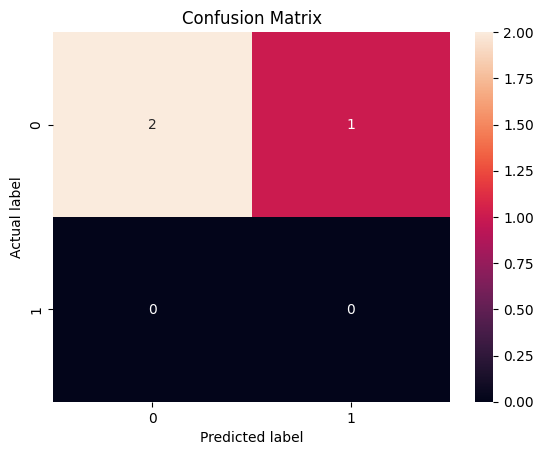

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


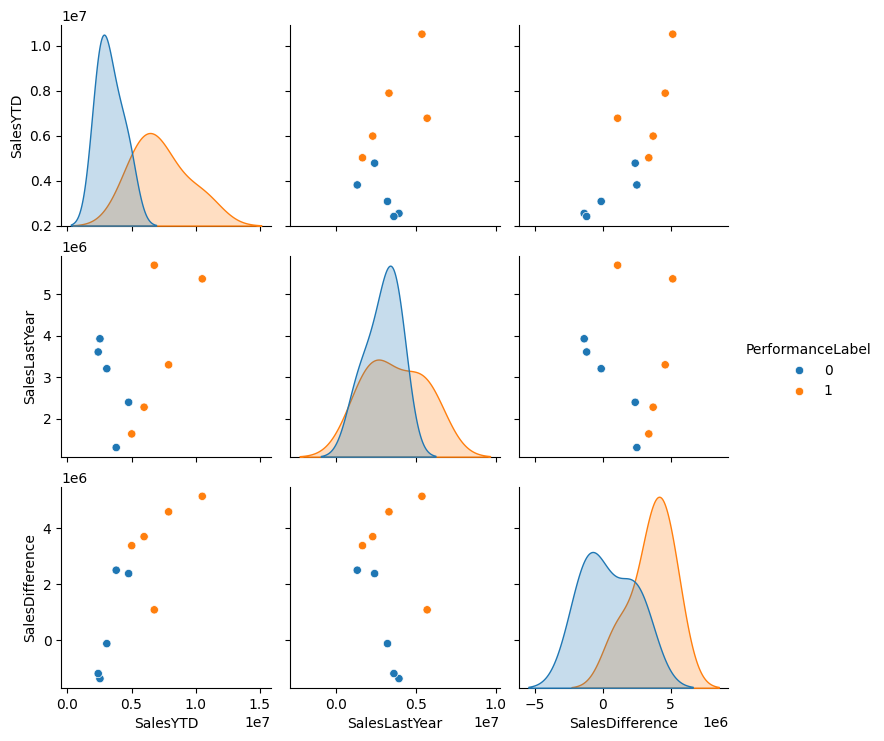

In [ ]:
# Feature Distribution
sns.pairplot(df[['SalesYTD', 'SalesLastYear', 'SalesDifference', 'PerformanceLabel']], hue='PerformanceLabel')
plt.show()


# **Dicussion**

**Interpretation of Results**:

- Accuracy: The model has an accuracy of approximately 66.7%, which means that it correctly predicts the performance category of the territories two-thirds of the time. This is a reasonable starting point, but there's room for improvement.

- F1 Score: With an F1 score of 0.8, we can infer that the model has a good balance between precision and recall for the positive class (which we assumed to be 'high performing' territories). This suggests that when the model predicts a territory is high performing, it is correct 80% of the time.

- SalesYTD (Sales Year-To-Date): This subplot shows the distribution of Year-To-Date sales for both high and low-performing territories. High performing territories (label 1) seem to have a generally higher SalesYTD, as indicated by the density on the right side of the SalesYTD distribution plot.

- SalesLastYear: This distribution plot indicates the sales from the previous year. Similar to SalesYTD, higher values are more frequently associated with high-performing territories, but the distinction is less pronounced than in SalesYTD, suggesting that the current year's performance might be a stronger indicator of territory performance.

- SalesDifference: This variable represents the difference in sales between the current year and the previous year. The distribution shows a slight overlap between high and low performers, but high performers tend to have a positive SalesDifference, indicating growth or at least stability in sales figures.

- Scatter Plots: The scatter plots show the relationship between pairs of these variables. For instance, the scatter plot for SalesYTD vs. SalesLastYear shows a positive correlation between the two, indicating that territories that performed well in the previous year tend to continue performing well in the current year.

- Performance Label: The color-coding clearly demarcates the high performers from the low performers, with the high performers often having higher values in the feature variables.